In [76]:
import pickle
import matplotlib.pylab as plt

In [77]:
infile = open("/home/lonce/working/sonyGanKeepers/lowDbigB/lowDbigB_losses.pkl",'rb')

In [78]:
new_dict = pickle.load(infile)
infile.close()

In [79]:
new_dict[0].keys() # one dictionary entry for each scale

dict_keys(['scale', 'iter', 'lossD_fake', 'lossD_real', 'lossG_fake', 'Spread_R-F', 'lipschitz_norm', 'lossD_GP', 'alpha', 'lossG', 'lossD_classif', 'lossD_Epsilon', 'lossG_classif', 'lossD'])

In [80]:
# first lets concatenate the scales together in to catdict
catdict = {}
for k in new_dict[0].keys() :
    if k != 'scale' :    
        catdict[k]=[]
        for s in range(len(new_dict)) :    #for each scale
            catdict[k]=catdict[k]+new_dict[s][k]

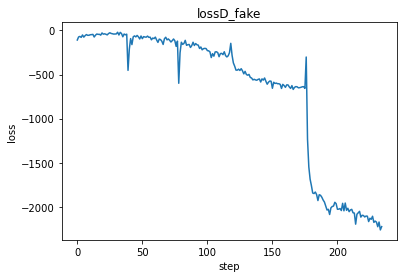

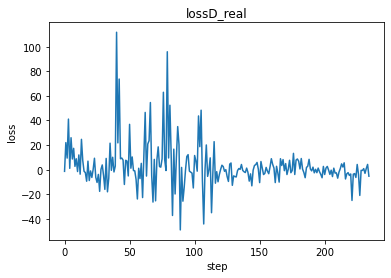

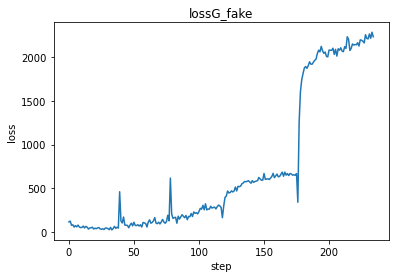

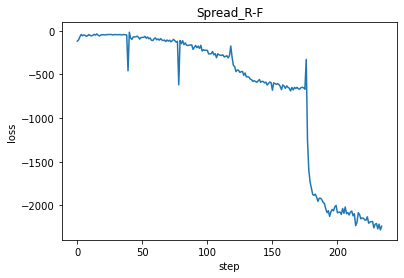

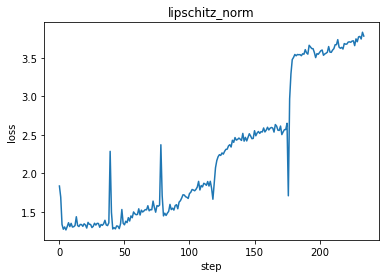

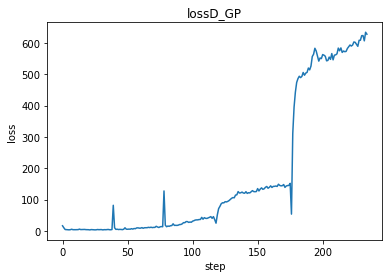

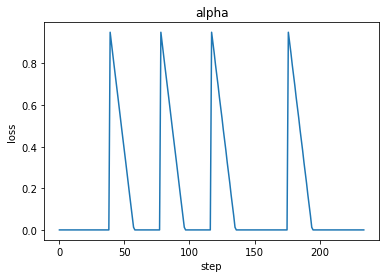

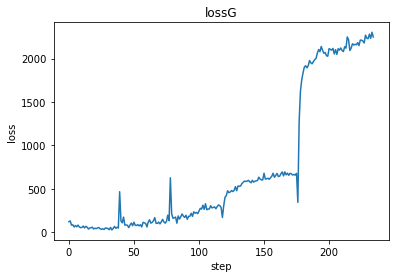

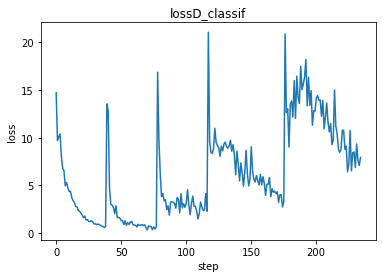

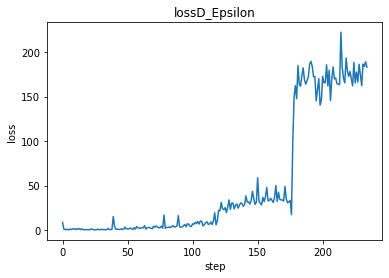

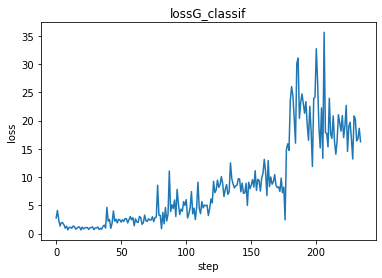

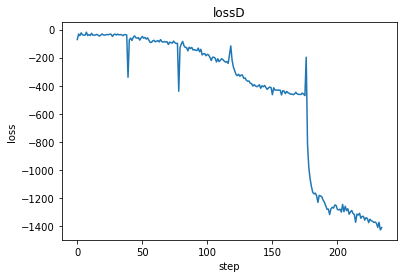

In [81]:
# plot each measure
for k in catdict :
    if k != 'iter':
        plt.plot(catdict[k])
        plt.ylabel('loss')
        plt.xlabel('step')
        plt.title(k)
        plt.show()

total steps is 235


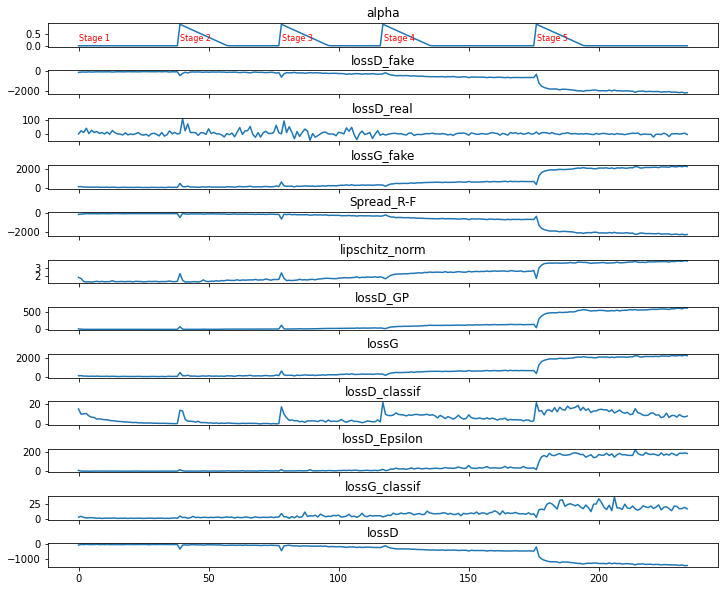

In [82]:
# combine into one fig and add formatting for visualization and copying images elsewhere

stages=[200000, 200000, 200000, 300000, 300000 ]
totaliters=sum(stages[:5])
totalsteps=len(catdict['iter'])
print("total steps is {}".format(totalsteps))
               
numplots=len(catdict)-1 #dont plot 'iter'
fig, ax = plt.subplots(numplots,sharex=True, gridspec_kw={'hspace': 1}, figsize=(12,10))

cnt=0
ax[cnt].plot(catdict['alpha']) 
ax[cnt].set_title('alpha')
ax[cnt].annotate('Stage 1', (sum(stages[:0]), 0.2), textcoords='data', size=8, color='red')
ax[cnt].annotate('Stage 2', (totalsteps*sum(stages[:1])/totaliters, 0.2), textcoords='data', size=8, color='red')
ax[cnt].annotate('Stage 3', (totalsteps*sum(stages[:2])/totaliters, 0.2), textcoords='data', size=8, color='red')
ax[cnt].annotate('Stage 4', (totalsteps*sum(stages[:3])/totaliters, 0.2), textcoords='data', size=8, color='red')
ax[cnt].annotate('Stage 5', (totalsteps*sum(stages[:4])/totaliters, 0.2), textcoords='data', size=8, color='red')
cnt=1
    
for k in catdict :
    if k != 'iter' and k != 'alpha' :
        ax[cnt].plot(catdict[k]) 
        ax[cnt].set_title(k)
        cnt=cnt+1